In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

поэкспериментируйте с параметрами алгоритма differential_evolution: strategy, popsize, mutation
The differential evolution strategy to use. Should be one of:
‘best1bin’
‘best1exp’
‘rand1exp’
‘randtobest1exp’
‘currenttobest1exp’
‘best2exp’
‘rand2exp’
‘randtobest1bin’
‘currenttobest1bin’
‘best2bin’
‘rand2bin’
‘rand1bin’

In [3]:
st = [
'best1bin',
'best1exp',
'rand1exp',
'randtobest1exp',
'currenttobest1exp',
'best2exp',
'rand2exp',
'randtobest1bin',
'currenttobest1bin',
'best2bin',
'rand2bin',
'rand1bin'   
]

In [4]:
result = differential_evolution(ackley, bounds,  strategy='best2bin', seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 5073
     nit: 166
 success: True
       x: array([0., 0.])

In [5]:
result.nit

166

In [6]:
for i in st:
    result = differential_evolution(ackley, bounds,  strategy=i, seed=42)
    print ('Strategy = ', i, ', Message : ', result.message,', nit = ', result.nit, ', x = ', result.x )

Strategy =  best1bin , Message :  Optimization terminated successfully. , nit =  90 , x =  [0. 0.]
Strategy =  best1exp , Message :  Optimization terminated successfully. , nit =  147 , x =  [0. 0.]
Strategy =  rand1exp , Message :  Optimization terminated successfully. , nit =  246 , x =  [0. 0.]
Strategy =  randtobest1exp , Message :  Optimization terminated successfully. , nit =  156 , x =  [0. 0.]
Strategy =  currenttobest1exp , Message :  Maximum number of iterations has been exceeded. , nit =  1000 , x =  [0. 0.]
Strategy =  best2exp , Message :  Optimization terminated successfully. , nit =  244 , x =  [0. 0.]
Strategy =  rand2exp , Message :  Optimization terminated successfully. , nit =  341 , x =  [0. 0.]
Strategy =  randtobest1bin , Message :  Optimization terminated successfully. , nit =  101 , x =  [0. 0.]
Strategy =  currenttobest1bin , Message :  Maximum number of iterations has been exceeded. , nit =  1000 , x =  [0. 0.]
Strategy =  best2bin , Message :  Optimization te

In [7]:
nit = []
for i in st:
    result = differential_evolution(ackley, bounds,  strategy=i, seed=42, popsize = 3, mutation =1)
    print ('Strategy = ', i, ', Message : ', result.message,', nit = ', result.nit , ', x = ', result.x)
    nit.append(result.nit)
    

Strategy =  best1bin , Message :  Optimization terminated successfully. , nit =  13 , x =  [ 1.30536302e-09 -3.06323007e-09]
Strategy =  best1exp , Message :  Optimization terminated successfully. , nit =  10 , x =  [-2.10666760e-08  9.52166436e-01]
Strategy =  rand1exp , Message :  Optimization terminated successfully. , nit =  42 , x =  [ 9.52166533e-01 -3.10046562e-09]
Strategy =  randtobest1exp , Message :  Optimization terminated successfully. , nit =  19 , x =  [-2.05112714e-09 -6.05856129e-09]
Strategy =  currenttobest1exp , Message :  Optimization terminated successfully. , nit =  10 , x =  [-2.91990985e-08  9.52166429e-01]
Strategy =  best2exp , Message :  Optimization terminated successfully. , nit =  54 , x =  [-0.00334679  0.12258096]
Strategy =  rand2exp , Message :  Maximum number of iterations has been exceeded. , nit =  1000 , x =  [-1.98599060e-14 -3.14942599e-12]
Strategy =  randtobest1bin , Message :  Optimization terminated successfully. , nit =  22 , x =  [-9.52166

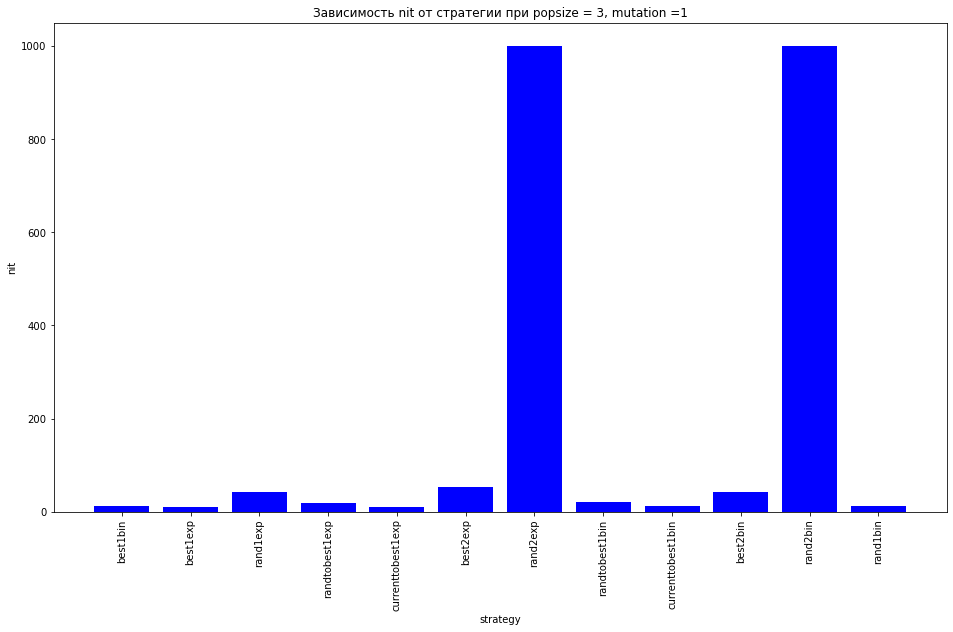

In [8]:
plt.rcParams ['figure.figsize'] = [16, 9]
plt.xticks(rotation=90)
plt.bar(st, nit,color = 'blue')   
plt.title('Зависимость nit от стратегии при popsize = 3, mutation =1')   
plt.xlabel('strategy')   
plt.ylabel('nit')   
plt.show()   
